In [11]:
#private cell
import openai
import os
from getpass import getpass
import os

REPLICATE_API_TOKEN = ""
os.environ["REPLICATE_API_TOKEN"] = REPLICATE_API_TOKEN


path = "c:/Users/yonat/Box/Sync/Work/Papers/Drafting Ks/Source_Materials/"
fpath = r"c:/Users/yonat/Box/Sync/Work/Papers/Drafting Ks/New_Scripts/Outputs/Ellington/" 
openai.api_key = ""
anthropic_api_key = ""

print ("Done")

Done


In [2]:
import time
import openai
from anthropic import Anthropic, HUMAN_PROMPT, AI_PROMPT
import os
import replicate
import pandas as pd
import time

In [3]:

preamble = '''
You are roleplaying as a judge. The following case comes in front of you. The parties dispute the interpretation of the contract below. Read it carefully and then respond: '''


contract = '''AGREEMENT made this 19th day of December, 1961, by and between EDWARD KENNEDY ELLINGTON (also known as DUKE ELLINGTON), his wife, EDNA ELLINGTON, his only son, MERCER RUTH STAMATION formerly known as RS ELLINGTON, and his only sister ARUTH JAMES, hereinafter designated as "First Parties", and MILLS MUSIC, INC., a New York corporation, AMERICAN ACADEMY OF MUSIC, INC., GOTHAM MUSIC SERVICE, INC., and their predecessors in interest, and any other affiliate of Mills Music, Inc., hereinafter designated as "Second Party" (which term, as hereinafter used, shall apply to all or any of them);

WITNESSETH

WHEREAS, Duke Ellington represents and warrants that he has composed and written, in whole or in part, the music and/or lyrics of various musical compositions first published and registered for copyright during the year 1927 and in subsequent years thereto, the titles of which are mentioned in Schedule "1", Schedule "2", Schedule "3", and Schedule "4" hereto attached and made part hereof. All musical compositions written and composed in whole or in part by Duke Ellington, published by Mills Music, Inc., American Academy of Music, Inc., Gotham Music Service, Inc., or any of them or any of their predecessors in interest and of any other affiliate of Mills Music, Inc., or assigned to them by Duke Ellington but remaining unpublished during said period, are intended to be covered thereby, whether or not actually set forth in said Schedule "1", Schedule "2", Schedule "3", and Schedule "4"; and

WHEREAS, Duke Ellington represents and warrants that he has not heretofore sold, assigned, transferred, or otherwise disposed of, or pledged, hypothecated, or otherwise encumbered the United States renewal rights or copyrights of the musical compositions listed in Schedule "1", Schedule "2", or Schedule "3", or any other musical compositions not listed therein but covered thereby or any interest therein or thereto or any of them other than such agreements, in writing or oral, as Duke Ellington may have heretofore entered into with the Second Party or any of its affiliated companies; and

WHEREAS, the Second Party desires to contract with the First Parties for their interest in the United States renewal copyrights in the musical compositions mentioned in Schedule "1", Schedule "2", and Schedule "3".

NOW, THEREFORE, in consideration of the sum of Five ($5.00) Dollars, and other good and valuable consideration, by each of the parties to each of the other parties in hand paid at or before the sealing and delivery of these presents, the receipt whereof is hereby acknowledged, it is hereby agreed:

The First Parties, subject to the terms, conditions, and reservations hereinafter set forth, hereby sell, assign, transfer, and set over unto the Second Party and its successors and assigns, the United States renewal copyrights of the musical compositions set forth in Schedule "1", Schedule "2", and Schedule "3" hereto annexed, and all their right, title, and interest in and to the said musical compositions subject to the payment of royalties hereinafter provided for.

The First Parties hereby authorize and empower the Second Party to renew pursuant to law, for and in the name of Duke Ellington, as author, if living, the copyrights of the musical compositions set forth in Schedule "1", Schedule "2", and Schedule "3", and the First Parties hereby set forth and appoint the Second Party and its successors and assigns, or their agents, officers, servants, or employees, or any of them, or the appointee or designee of any of them, their agent and attorney-in-fact, to renew pursuant to law, for and in the name of Duke Ellington, as author, if living, the copyrights of the said musical compositions and each of them mentioned in Schedule "1", Schedule "2", and Schedule "3", and to execute and deliver in their name and on behalf of the author, Duke Ellington, if living, any instrument or instruments assigning to the Second Party and its successors and assigns, the United States renewal copyrights of said musical compositions and each of them, together with all rights therein and thereto, and if Duke Ellington is not living, any instrument or instruments assigning to the Second Party and its successors or assigns, all of their interests in said renewal copyrights as they become entitled thereto, subject to the terms and conditions and the payment of royalties hereinafter provided. If the copyright law in the United States, now in force, shall be changed or amended so as to provide and extend for a longer term of copyright, then the First Parties hereby assign, transfer, and set over to the Second Party and its successors and assigns and designees, all their right, title, and interest in and to the musical compositions covered by this agreement for such extended and longer term of copyright.

The Second Party agrees to pay or cause to be paid to the First Parties the following royalties:

(a) On all copies published, sold, and paid for to the Second Party in the United States of America and Canada of the musical compositions covered by this agreement during the term of the respective copyright in the United States, a royalty of four and a half (4.5) cents for each pianoforte copy sold in the United States and Canada and paid for, and ten (10%) percent of the wholesale selling price after trade discounts for each orchestra arrangement sold in the United States and Canada and paid for, and a sum equal to fifty (50%) percent of the net revenue actually received by the Second Party from synchronization, background, electrical transcription, foreign publication, or other exploitation, the use of said compositions by mechanical instruments, such as phonographs, music rolls, the use of the titles, dramatization, and literary uses.

(b) As and when any of said musical compositions are published in any folio or composite work regardless of the number of copies published, if published by the Second Party, then ten (10%) percent of the wholesale price divided by the number of copyrighted works within the folio, and if published by a licensee or assignee of the Second Party, then fifty (50%) percent of the sums received by the Second Party divided by the number of copyrighted works within the folio. Folios and/or composite works as referred to shall be deemed to include any publication in a collection of at least five (5) or more musical compositions or separate lyrics contained within the same volume and/or binding.

(c) The First Parties shall not be entitled to any share of the monies distributed to the Second Party by the American Society of Composers, Authors and Publishers or by them through any other performing rights society or agency throughout the world if the writers received through the same source an amount which, in the aggregate, is at least equal to the aggregate amount distributed to the Second Party. If, however, the so-called small performing right shall be administered directly by the Second Party, then the Second Party shall pay an amount equal to fifty (50%) percent of the net sums received by the Second Party therefrom. Said royalties shall be paid upon entire musical compositions (lyrics and music), and if Duke Ellington, the author, shall not have been the sole author of said entire musical compositions (lyrics and music), then said royalties shall be divided one-half (1/2) among all authors and one-half (1/2) among all composers of each separate number, unless otherwise agreed upon by the writers.

Commencing January 1, 1962, the royalties payable to the First Parties, domestic and foreign musical compositions published by the Second Party shall, during the original term of the United States copyright, be equal to the rates herein provided, and such rates shall apply retroactively to January 1, 1958, on all payments received and accepted by Duke Ellington since said date.

Payment of all royalties and advances shall be made to Duke Ellington, as author, while living. When such person or persons who shall be lawfully entitled to receive the same, Duke Ellington, as author, hereby confirms the fact that prior to the date of this agreement, Mills Music Inc., American Academy of Music, Inc., and Gotham Music Service, Inc., or any of their predecessors in interest or any other affiliated companies of Mills Music, Inc. not specifically mentioned were and are now possessed of and are entitled to the original copyrights of the musical compositions mentioned in said Schedules "1", "2", and "3", and each and every composition included therein, and that Duke Ellington, as author, duly assigns to Mills Music, Inc., American Academy of Music, Inc., Gotham Music Service, Inc., or to their respective predecessors in interest or to any other affiliate of Mills Music, Inc. not specifically mentioned herein, prior to its securing the copyright thereof, all their right, title, and interest in and to said musical compositions mentioned in Schedules "1", "2", and "3" and any other musical compositions not listed therein but covered hereby, and this right, title, and interest therein and thereto. Duke Ellington, author, hereby confirms complete ownership in Mills Music, Inc., and/or its affiliated companies of all unpublished musical compositions set forth in Schedule "4" and hereby ratifies and confirms all agreements in writing or oral made with respect to these musical compositions.

The Second Party also, and in addition to the royalties payable under paragraph 3 hereinbelow, agrees for good and valuable consideration to pay to Duke Ellington while living, and thereafter to his designee or to such person or persons who shall be lawfully entitled thereto, the sum of One Hundred Thousand ($100,000) Dollars in the following manner:

Ten Thousand ($10,000) Dollars each year for the next ten (10) continuous years commencing as of January 1962, and payable in semi-annual installments as follows:

$5,000.00 on January 5, 1962;
$5,000.00 on July 5, 1962;
$5,000.00 on January 5, 1963;
$5,000.00 on July 5, 1963;
$5,000.00 on January 5, 1964;
$5,000.00 on July 5, 1964;
$5,000.00 on January 5, 1965;
$5,000.00 on July 5, 1965;
$5,000.00 on January 5, 1966;
$5,000.00 on July 5, 1966;
$5,000.00 on January 5, 1967;
$5,000.00 on July 5, 1967;
$5,000.00 on January 5, 1968;
$5,000.00 on July 5, 1968;
$5,000.00 on January 5, 1969;
$5,000.00 on July 5, 1969;
$5,000.00 on January 5, 1970;
$5,000.00 on July 5, 1970;
$5,000.00 on January 5, 1971;
$5,000.00 on July 5, 1971.

In the event that the Second Party should default in the making of any of said payments, and such default should continue for sixty (60) days, the First Parties (or Duke Ellington alone, if living) shall have the option, by written notice which may be sent to Mills Music, Inc., its successor or assigns, to declare the entire unpaid balance of said One Hundred Thousand ($100,000) Dollars immediately due and payable.

In the event that the Second Party or its successors or assigns, or a purchaser of any of the musical compositions contained in Schedules "3" and "4", shall go bankrupt or file a petition in bankruptcy or commit an act of bankruptcy or make an assignment for the benefit of creditors or become insolvent or that its business shall be in the hands of a liquidating trustee, receiver, or assignee at any time prior to the payment in full of the aforesaid sum of One Hundred Thousand ($100,000) Dollars, the First Parties, or Duke Ellington alone if he be living, shall, at their option and without prejudice to their other rights, have the right to terminate this agreement and the assignment of its musical compositions, except those compositions listed in Schedules "1" and "4", without returning any sums theretofore received by them, and all the rights granted or confirmed to the Second Party herein would revert to the First Parties, and in such event, the Second Party shall turn over to the First Parties all material available on said musical compositions.

The Second Party agrees to deliver to the First Parties, or to Duke Ellington alone if living, at his or their last known residence or at such address as he or they shall designate, semi-annually, within sixty (60) days after the last day of June and December of each year, a statement showing all royalties or other sums due and owing to the First Parties therein for the preceding half-year, first, however, deducting all advances, if any, and at the same time paying all sums that such statement shows to be then due. The said First Parties, or Duke Ellington alone if living, shall have the right at all times, upon reasonable notice, to examine and inspect all of the Second Party's books and records relating to their exploitation of and receipts from the aforesaid musical compositions mentioned in Schedules "1", "2", "3", and "4".

This agreement shall be binding upon and shall inure to the benefit of the First Parties, their heirs, executors, administrators, and assigns, and also to the Second Party, its successors and assigns.

The Second Party agrees that in the event its successors or assigns, or its trustee in bankruptcy, assignee for the benefit of creditors, liquidating trustee, receiver, or assignee, sells or assigns any of the musical compositions contained in Schedules "1", "2", "3", and "4", it will be on condition that the purchaser will be bound by and agree to perform all the terms and conditions of this agreement on the part of the Second Party.

By written instruments dated September 1, 1956, Duke Ellington, as author, assigned to Mills Music, Inc., his United States renewal rights in and to the musical compositions set out in the schedules attached hereto, and this instrument was duly recorded in the Copyright Office identified as Volume 967, page 56, on October 8, 1956, and the Second Party agrees to record an amended instrument signed by the author, Duke Ellington, which will in substance recite that this assignment is subject to the terms and conditions of this agreement.

Mills Music, Inc., American Academy of Music, Inc., and Gotham Music Service, Inc. hereby jointly and severally represent and warrant that they have the authority to sign for and bind all of the predecessors in interest and other affiliates of Mills Music, Inc. included in the term "Second Party" as hereinabove used.

IN WITNESS WHEREOF, the parties hereto have duly executed this agreement the day and year first above written.

----
Based on this agreement, answer the following question: 
'''

questions = [
    "Is EMI allowed to deduct the fees of the foreign subpublishers, after affiliating with them, before sharing revenues with Ellington, under the existing contract? Start your answer with Yes or No",
    "Does the agreement permit EMI to deduct expenses from affiliated foreign subpublishers prior to distributing royalties to Ellington? Start your answer with Yes or No",
    "According to the contractual agreement, can EMI affiliate with foreign subpublishers post-execution and then subtract their fees before splitting revenues with Ellington? Start your answer with Yes or No",
    "Is it within the contract's terms for EMI to remove the charges of foreign subpublishers, which it affiliated with after the contract's formation, before dividing revenues with Ellington? Start your answer with Yes or No",
    "Can EMI legally subtract the costs of post-agreement affiliated foreign subpublishers before splitting revenues with Ellington, as per the terms of the contract? Start your answer with Yes or No",
    "Is it permissible for EMI, under the contract, to deduct fees from its newly affiliated foreign subpublishers prior to sharing royalties with Ellington? Start your answer with Yes or No",
    "Does the contract sanction EMI to deduct fees from foreign subpublishers, who became affiliates after the contract was signed, before sharing revenue with Ellington? Start your answer with Yes or No",
    "Based on the existing contract, is it legal for EMI to subtract the fees of its post-agreement affiliated foreign subpublishers before sharing profits with Ellington? Start your answer with Yes or No",
    "Can EMI, following the contract's execution, associate with foreign subpublishers and then deduct their fees before sharing the remaining revenues with Ellington, based on the contract? Start your answer with Yes or No",
    "Does the contract allow EMI to establish affiliations with foreign subpublishers after signing the agreement and then deduct these subpublishers' fees prior to dividing the royalties with Ellington? Start your answer with Yes or No",
    "Is EMI within its contractual rights to affiliate with foreign subpublishers post-agreement and then deduct their charges before sharing the revenues with Ellington? Start your answer with Yes or No",
    "Does the contract with Ellington permit EMI to form affiliations with foreign subpublishers post-signing and subtract their costs before sharing the profits? Start your answer with Yes or No",
    "Is EMI, under the terms of the agreement, allowed to establish affiliations with foreign subpublishers and then deduct their charges prior to dividing the revenues with Ellington? Start your answer with Yes or No",
    "Can EMI, under the contractual obligations, subtract the charges of affiliated foreign subpublishers before sharing the remaining revenue with Ellington? Start your answer with Yes or No",
    "As per the contract's terms, can EMI form affiliations with foreign subpublishers after the contract is signed and then deduct their costs before splitting the revenues with Ellington? Start your answer with Yes or No",
    "Can EMI affiliate with foreign subpublishers after the contract's inception, and then, according to the contract's terms, subtract their fees before sharing revenues with Ellington? Start your answer with Yes or No",
    "Does the agreement with Ellington grant EMI the permission to form new affiliations with foreign subpublishers, subtract their fees, and then share the remaining revenues? Start your answer with Yes or No",
    "Is EMI allowed by the contract to form post-agreement affiliations with foreign subpublishers and then deduct their costs before sharing revenues with Ellington? Start your answer with Yes or No",
    "According to the contractual terms, can EMI form affiliations with foreign subpublishers post-signing, subtract their fees, and then share the remainder of the revenues with Ellington? Start your answer with Yes or No",
    "As per the existing contract, can EMI, after forming affiliations with foreign subpublishers, subtract their charges before splitting the remaining revenues with Ellington? Start your answer with Yes or No"
]



In [4]:
#Query the Llama-2 model hosten on Replicate


def get_output(prompt):
    output = replicate.run(
        "andreasjansson/sheep-duck-llama-2-70b-v1-1-gguf:a8d46304cdc3e0b4f18773b2863a0bf24a1daa7fd43e9e94f6d7f197a759152b",
        input={"prompt": f"{prompt}", "max_tokens": 150, "temperature": 1, "top_p": 1}
    )
    return ''.join(output)

all_questions = []
all_responses = []

# Iterate over each question and retrieve 10 responses
for question in questions:
    prompt = f"{preamble}   \n {contract} \n {question}"

    for _ in range(10):
        response = get_output(prompt)
        all_responses.append(response)
        all_questions.append(question)

# Save results to Excel
df = pd.DataFrame({'Question': all_questions, 'Response': all_responses})
df.to_excel('d:/outputs/Ellington_sheep-duck-llama-2-70b.xlsx', index=False)


In [6]:
from tqdm import tqdm


def save_to_excel(model_name, question_list, response_list):
    directory = 'd:/outputs'
    if not os.path.exists(directory):
        os.makedirs(directory)
    df = pd.DataFrame({'Question': question_list, 'Response': response_list})
    filename = f"Ellington_{model_name}.xlsx"
    df.to_excel(os.path.join(directory, filename), index=False)

def query_openai_model(model_name, text):
    completions = []
    while True:
        try:
            time.sleep(5)  # 5-second wait between queries
            response = openai.ChatCompletion.create(
                model=model_name,
                temperature=1,
                top_p=1,
                n=10,  # Requesting 10 completions
                messages=[
                    {"role": "system", "content": "You are a helpful assistant."},
                    {"role": "user", "content": f"{text}"}
                ]
            )
            completions = [choice['message']['content'] for choice in response['choices']]
            for completion in completions:
                print(completion)  # Print the response
            return completions
        except openai.error.RateLimitError as e:
            error_message = e.args[0] if e.args else str(e)
            wait_time = int(error_message.split("Please try again in ")[1].split("ms")[0]) / 1000
            print(f"Rate limit reached. Waiting for {wait_time} seconds...")
            time.sleep(wait_time)

def query_anthropic_model(model_name, text):
    anthropic = Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=anthropic_api_key,
    )
    responses = []
    for _ in range(10):  # Requesting 10 completions through iteration
        completion = anthropic.completions.create(
            model=model_name,
            max_tokens_to_sample=250,
            temperature=1,
            top_p=1,
            prompt=f"{HUMAN_PROMPT} {text}.{AI_PROMPT}"
        )
        responses.append(completion.completion)
    return responses

#models = ['gpt-4', 'claude-2']
models = ['claude-2']

for model in models:
    all_questions = []
    all_responses = []
    
    # Process each question
    for question in tqdm(questions):
        prompt = f"{preamble} {contract} {question}"
        
        if model == 'gpt-4':
            responses = query_openai_model(model, prompt)
            # Immediately save GPT-4 responses after querying
            all_questions.extend([question] * 10)
            all_responses.extend(responses)
            save_to_excel(model, all_questions, all_responses)
            
        elif model == 'claude-2':
            responses = query_anthropic_model(model, prompt)
            all_questions.extend([question] * 10)
            all_responses.extend(responses)
    
    if model == 'claude-2':  # Save Claude-2 responses after all queries are done
        save_to_excel(model, all_questions, all_responses)


  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [46:45<00:00, 140.29s/it]


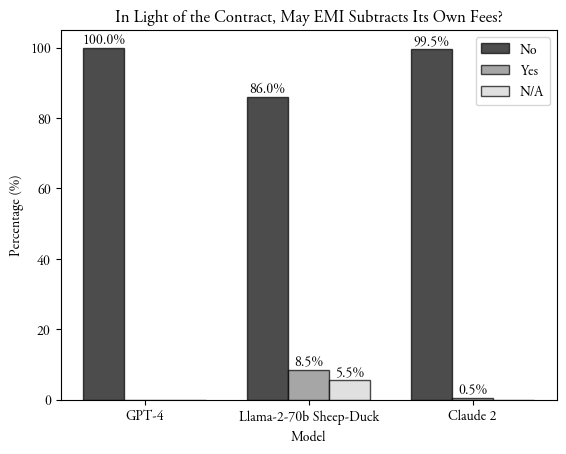

In [37]:
#Analyze Data

import pandas as pd
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def modified_counting(file_path):
    df = pd.read_excel(file_path)  # <-- This line was missing in your code
    yes_count = 0
    no_count = 0
    unclassified_count = 0
    regex = re.compile(r'\b(yes|no)\b', re.IGNORECASE)
    
    for response in df['Response']:
        stripped_response = response.strip()
        if re.match(r'^(yes|no)[,\.!?\s]*', stripped_response[:10], re.IGNORECASE):
            matches = regex.findall(stripped_response[:10])
            counts = Counter(match.lower() for match in matches)
            yes_count += counts.get('yes', 0)
            no_count += counts.get('no', 0)
        else:
            unclassified_count += 1
            
    return yes_count, no_count, unclassified_count

local_file_paths = [  # Replace with your actual paths
    f'{fpath}Ellington_gpt-4.xlsx',
    f'{fpath}Ellington_sheep-duck-llama-2-70b.xlsx',
    f'{fpath}Ellington_claude-2.xlsx'
]

models = []
yes_counts = []
no_counts = []
na_counts = []

for file_path in local_file_paths:
    yes_count, no_count, unclassified_count = modified_counting(file_path)
    model_name = file_path.split('/')[-1].split('.')[0]
    if 'gpt-4' in model_name.lower():
        model_name = 'GPT-4'
    elif 'sheep-duck-llama-2-70b' in model_name.lower():
        model_name = 'Llama-2-70b Sheep-Duck'
    elif 'claude-2' in model_name.lower():
        model_name = 'Claude 2'
    models.append(model_name)
    yes_counts.append(yes_count)
    no_counts.append(no_count)
    na_counts.append(unclassified_count)

# Calculate percentages
total_counts = np.array(yes_counts) + np.array(no_counts) + np.array(na_counts)
yes_percentages = (np.array(yes_counts) / total_counts) * 100
no_percentages = (np.array(no_counts) / total_counts) * 100
na_percentages = (np.array(na_counts) / total_counts) * 100

# Plotting
barWidth = 0.25
fsize = 10
plt.rc('font', family='Adobe Garamond Pro', size=fsize)

r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

bars1 = plt.bar(r1, no_percentages, color='black', alpha=0.7, width=barWidth, edgecolor='black', label='No')
bars2 = plt.bar(r2, yes_percentages, color='grey', alpha=0.7, width=barWidth, edgecolor='black', label='Yes')
bars3 = plt.bar(r3, na_percentages, color='lightgrey', alpha=0.7, width=barWidth, edgecolor='black', label='N/A')

# Add labels to bars
def add_labels(bars, percentages):
    for bar, percentage in zip(bars, percentages):
        if percentage != 0:  # Skip 0% labels
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{percentage:.1f}%", ha='center', va='bottom')

add_labels(bars1, no_percentages)
add_labels(bars2, yes_percentages)
add_labels(bars3, na_percentages)

plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)
plt.ylabel('Percentage (%)')
plt.title('In Light of the Contract, May EMI Subtracts Its Own Fees?')
plt.legend()

plt.savefig('yes_no_na_responses_by_model.png')
plt.show()
